<a href="https://colab.research.google.com/github/engineerjkk/-/blob/main/PSNR_CALCULATION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PEAK SIGNAL TO NOISE RATIO FOR FOUR THRESHOLD VALUES

# IMPORTING LIBRARIES

In [44]:
from skimage import io
from matplotlib import pyplot as plt
import numpy as np
import numpy
from skimage import io
import tensorflow as tf

tf.compat.v1.disable_eager_execution()



# READ AND DISPLAY AN IMAGE

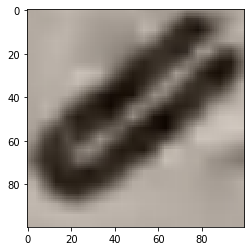

In [66]:
img = io.imread("U_original.png")
plt.imshow(img, cmap=plt.cm.gray, interpolation='nearest')  

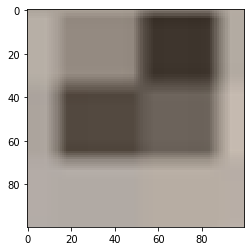

In [67]:
FPS1 = io.imread("U_fps1.png")
plt.imshow(FPS1, cmap=plt.cm.gray, interpolation='nearest')  

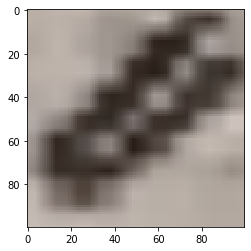

In [68]:
FPS5 = io.imread("U_fps5.png")
plt.imshow(FPS5, cmap=plt.cm.gray, interpolation='nearest')  

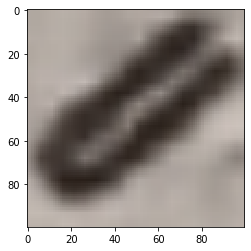

In [70]:
FPS10 = io.imread("U_fps10.png")
plt.imshow(FPS10, cmap=plt.cm.gray, interpolation='nearest')  

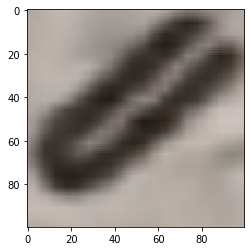

In [71]:
FPS30 = io.imread("U_fps30.png")
plt.imshow(FPS30, cmap=plt.cm.gray, interpolation='nearest')  

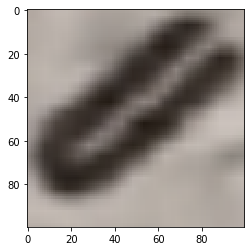

In [82]:
FPS30_2 = io.imread("U_fps30_2.png")
plt.imshow(FPS30_2, cmap=plt.cm.gray, interpolation='nearest')  

# CLEAN  THE NOISE  USING EDGE PRESERVING FILTER 

In [72]:
from skimage.restoration import denoise_nl_means, estimate_sigma
from skimage import img_as_ubyte, img_as_float

In [73]:
float_img = img_as_float(img)
sigma_est = np.mean(estimate_sigma(float_img, multichannel=True))


denoise_img = denoise_nl_means(float_img, h=1.15 * sigma_est, fast_mode=False, 
                               patch_size=5, patch_distance=3, multichannel=True)
                           
denoise_img_as_8byte = img_as_ubyte(denoise_img)





# CHOOSES THE REGION FOR IMAGE SEGMENTATION

In [74]:
segm1 = (denoise_img_as_8byte <= 64)
segm2 = (denoise_img_as_8byte > 64) & (denoise_img_as_8byte <= 97)
segm3 = (denoise_img_as_8byte > 97) & (denoise_img_as_8byte <= 137)
segm4 = (denoise_img_as_8byte > 137) & (denoise_img_as_8byte <= 179)
segm5 = (denoise_img_as_8byte > 179)





# DISPLAY AN IMAGE

# PSNR CALCULATIONS

In [75]:
def log10(x):
    numerator = tf.math.log(x)
    denominator = tf.math.log(tf.constant(10, dtype=numerator.dtype))
    return numerator / denominator




In [76]:
def psnr(im1, im2):
    img_arr1 = numpy.array(im1).astype('float32')
    img_arr2 = numpy.array(im2).astype('float32')
    mse = tf.reduce_mean(tf.math.squared_difference(img_arr1, img_arr2))
    psnr = tf.constant(255**2, dtype=tf.float32)/mse
    result = tf.constant(10, dtype=tf.float32)*log10(psnr)
    with tf.compat.v1.Session():
        result = result.eval()
    return result

# RESULT

In [77]:
psnr(img,FPS1)

14.726614

In [78]:
psnr(img,FPS5)

21.223965

In [79]:
psnr(img,FPS10)

25.985603

In [80]:
psnr(img,FPS30)

22.852913

In [83]:
psnr(img,FPS30_2)

24.906044

In [81]:
psnr(img,img)

inf